## Credit Score Classification

**Objective**:- The aim of this project is to developing a machine learning model to classify credit scores based on a person's credit-related information. The goal is to assist a global finance company in automating the segregation of individuals into credit score brackets, thereby reducing manual efforts and improving efficiency.

## 1. Import the necessary libararies

In [4]:
# For data manipulation and cleaning and Data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Scikit learn libraries for model evaluation
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2. Data reading

In [7]:
df_train = pd.read_csv("train.csv")
df_train

C:\Users\ayush\AppData\Local\Temp\ipykernel_14808\4101288200.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [9]:
df_train.shape

(100000, 28)

In [11]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
df_train.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [17]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [19]:
df_train.select_dtypes(include="object").describe()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [21]:
df_train.select_dtypes(include="number").corr()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


##  3. Exploratory Data Analysis

<Axes: ylabel='count'>

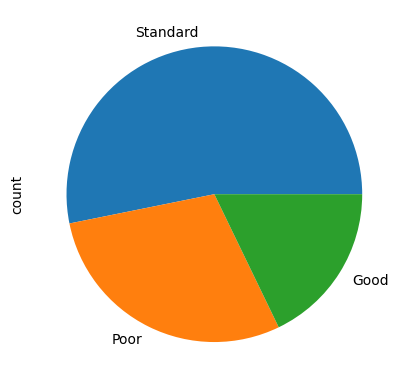

In [24]:
## for target column i.e credit score the univariate analysis
df_train["Credit_Score"].value_counts().plot(kind="pie")

(array([25019., 19659., 10600., 10365.,  6777.,  4487.,  3718.,  2420.,
         1046.,   907.]),
 array([  303.64541667,  1793.74420833,  3283.843     ,  4773.94179167,
         6264.04058333,  7754.139375  ,  9244.23816667, 10734.33695833,
        12224.43575   , 13714.53454167, 15204.63333333]),
 <BarContainer object of 10 artists>)

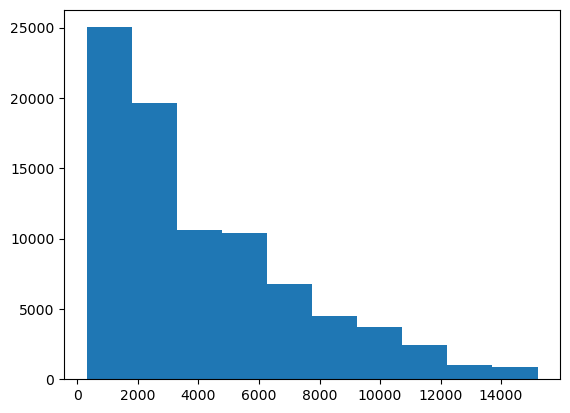

In [26]:
plt.hist(df_train["Monthly_Inhand_Salary"])

(array([ 9974.,  9937., 10248., 10048.,  9943.,  9893.,  9992., 10125.,
        10031.,  9809.]),
 array([    0. ,  1893.9,  3787.8,  5681.7,  7575.6,  9469.5, 11363.4,
        13257.3, 15151.2, 17045.1, 18939. ]),
 <BarContainer object of 10 artists>)

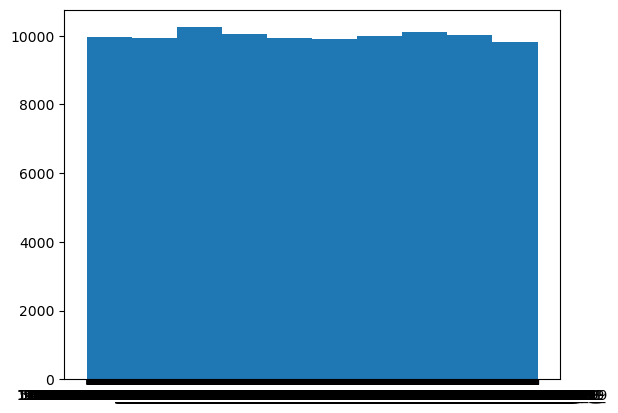

In [28]:
plt.hist(df_train["Annual_Income"])

(array([9.9556e+04, 4.9000e+01, 5.4000e+01, 5.4000e+01, 5.2000e+01,
        4.6000e+01, 5.1000e+01, 4.8000e+01, 4.6000e+01, 4.4000e+01]),
 array([  0. ,  43.3,  86.6, 129.9, 173.2, 216.5, 259.8, 303.1, 346.4,
        389.7, 433. ]),
 <BarContainer object of 10 artists>)

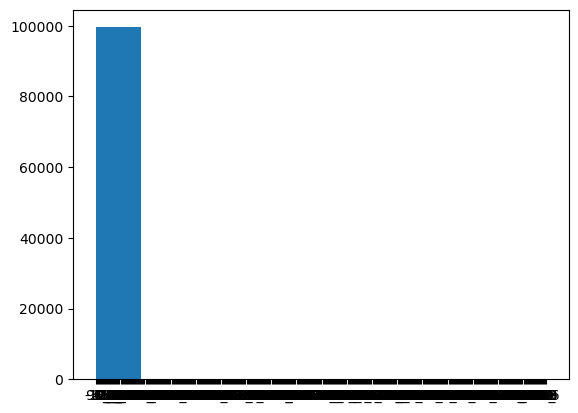

In [30]:
plt.hist(df_train["Num_of_Loan"])

(array([ 1426., 12055., 17049., 17621., 17866., 17969., 13188.,  2481.,
          313.,    32.]),
 array([20., 23., 26., 29., 32., 35., 38., 41., 44., 47., 50.]),
 <BarContainer object of 10 artists>)

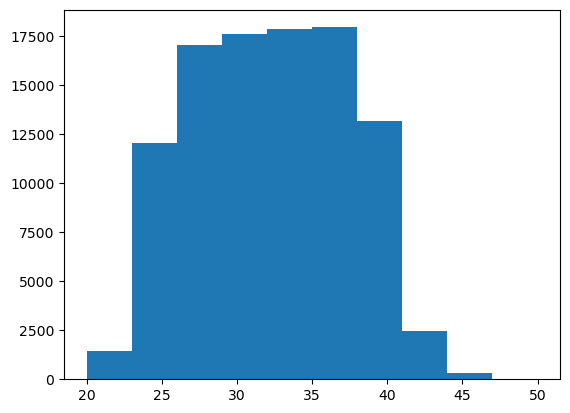

In [32]:
plt.hist(df_train["Credit_Utilization_Ratio"])

<Axes: xlabel='Credit_History_Age'>

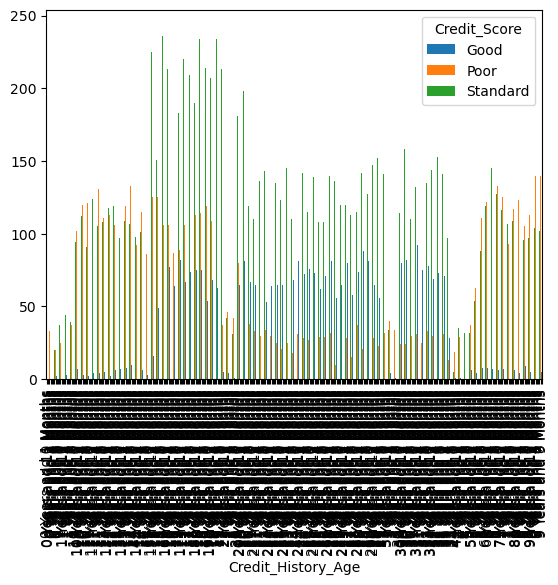

In [34]:
pd.crosstab(df_train.Credit_History_Age,df_train.Credit_Score).plot(kind="bar")

<Axes: xlabel='Outstanding_Debt'>

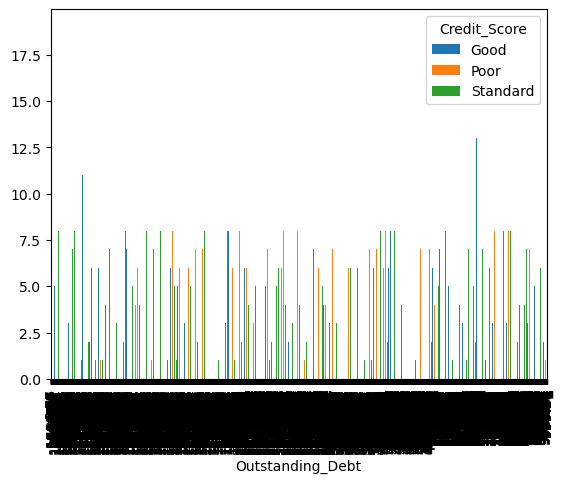

In [36]:
pd.crosstab(df_train.Outstanding_Debt,df_train.Credit_Score).plot(kind="bar")

<Axes: xlabel='Payment_Behaviour'>

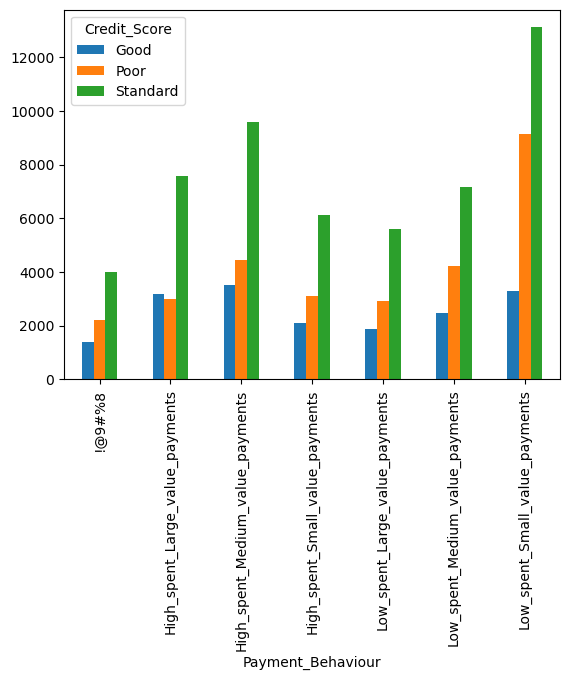

In [38]:
pd.crosstab(df_train.Payment_Behaviour,df_train.Credit_Score).plot(kind="bar")
## found the alphanumeric value

## 4. Data Cleaning and preprocessing

**Drop unnecessary columns**

In [26]:
df_train=df_train.drop(["ID","Name","Customer_ID","Month","SSN","Type_of_Loan"], axis=1)
df_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,NaN,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


**Handeling alphanumeric and other unnecessary values**

In [29]:
df_train = df_train.replace(['', 'nan', '!@9#%8', '#F%$D@*&8','_','NM'], np.NaN)

In [31]:
def convert_rating(num):
    num_str = str(num)
    
    # Check if the string contains only valid numeric characters and underscores
    if '_' in num_str:
        num_str = num_str.replace('_', '')
    
    if num_str.replace('.', '', 1).isdigit():  # Check if the remaining string is numeric
        return float(num_str)
    else:
        return np.NaN

In [33]:
columns_to_convert = [
    'Amount_invested_monthly', 'Monthly_Balance', 'Num_of_Delayed_Payment',
    'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Age', 'Annual_Income',
    'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt'
]
for col in columns_to_convert:
    df_train[col] = df_train[col].apply(convert_rating)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       99114 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               96124 non-null   float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92354 non-null   float64
 10  Changed_Credit_Limit      96323 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                79805 non-null   object 
 13  Outstanding_Debt          100000 non-null  fl

In [37]:
## Change change categorical values to numerical by using label encoder
# List of columns to be encoded
columns = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]

# Dictionary to store label mappings for each column
label_mappings = {}

# Iterate through each column and apply LabelEncoder
for col in columns:
    le = LabelEncoder()  # Create a new LabelEncoder for each column
    
    # Convert column to string type to handle any NaN or non-string values
    df_train[col] = df_train[col].astype(str)
    
    # Fit the LabelEncoder and transform the column
    df_train[col] = le.fit_transform(df_train[col])
    
    # Store the mapping of original values to encoded values for this column
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mappings for all columns
for col, mapping in label_mappings.items():
    print(f"Label Mapping for {col}: {mapping}")

Label Mapping for Occupation: {'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Writer': 14, '_______': 15}
Label Mapping for Credit_Mix: {'Bad': 0, 'Good': 1, 'Standard': 2, 'nan': 3}
Label Mapping for Payment_of_Min_Amount: {'No': 0, 'Yes': 1, 'nan': 2}
Label Mapping for Payment_Behaviour: {'High_spent_Large_value_payments': 0, 'High_spent_Medium_value_payments': 1, 'High_spent_Small_value_payments': 2, 'Low_spent_Large_value_payments': 3, 'Low_spent_Medium_value_payments': 4, 'Low_spent_Small_value_payments': 5, 'nan': 6}
Label Mapping for Credit_Score: {'Good': 0, 'Poor': 1, 'Standard': 2}


In [39]:
## Now replace the encoding values of null values so that it is god to fill them properly
df_train['Credit_Mix']=df_train['Credit_Mix'].replace(3, np.nan)
df_train['Payment_of_Min_Amount']=df_train['Payment_of_Min_Amount'].replace(2, np.nan)
df_train['Payment_Behaviour']=df_train['Payment_Behaviour'].replace(6, np.nan)

In [41]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       99114 non-null   float64
 1   Occupation                100000 non-null  int32  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               96124 non-null   float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92354 non-null   float64
 10  Changed_Credit_Limit      96323 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                79805 non-null   float64
 13  Outstanding_Debt          100000 non-null  fl

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,NaN,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.415295,2.0,312.494089,0
1,23.0,12,19114.12,NaN,3,4,3,4.0,-1,NaN,...,1.0,809.98,31.944960,NaN,0.0,49.574949,118.280222,3.0,284.629162,0
2,NaN,12,19114.12,NaN,3,4,3,4.0,3,7.0,...,1.0,809.98,28.609352,22 Years and 3 Months,0.0,49.574949,81.699521,4.0,331.209863,0
3,23.0,12,19114.12,NaN,3,4,3,4.0,5,4.0,...,1.0,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,5.0,223.451310,0
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,NaN,...,1.0,809.98,24.797347,22 Years and 5 Months,0.0,49.574949,41.420153,1.0,341.489231,0


In [43]:
## change Credit history age into numerical in months
def convert_to_months(value):
    if pd.isnull(value):
        return np.nan  # Handle NaN values
    try:
        # Initialize years and months to zero
        years, months = 0, 0
        
        # If 'Years' is in the string, extract the number of years
        if 'Years' in value:
            years = int(value.split(' Years')[0].strip())
        
        # If 'Months' is in the string, extract the number of months
        if 'Months' in value:
            months = int(value.split('and ')[1].split(' Months')[0].strip())
        
        # Return total months (years converted to months + months)
        return (years * 12) + months
    except Exception as e:
        print(f"Error processing value {value}: {e}")
        return np.nan  # Return NaN if parsing fails

# Apply the conversion function to the 'Credit_History_Age' column
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_to_months)

In [45]:
## Now all data in numeric but lets make it of same data type i.e change int to float 
import pandas as pd

# Iterate over each column in the DataFrame
for col in df_train.columns:
    # Check if the column datatype is integer
    if pd.api.types.is_integer_dtype(df_train[col]):
        # Change the column's datatype to float
        df_train[col] = df_train[col].astype(float)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       99114 non-null   float64
 1   Occupation                100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               96124 non-null   float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    92354 non-null   float64
 10  Changed_Credit_Limit      96323 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                79805 non-null   float64
 13  Outstanding_Debt          100000 non-null  fl

In [47]:
df_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,NaN,809.98,26.822620,265.0,0.0,49.574949,80.415295,2.0,312.494089,0.0
1,23.0,12.0,19114.12,NaN,3.0,4.0,3.0,4.0,-1.0,NaN,...,1.0,809.98,31.944960,NaN,0.0,49.574949,118.280222,3.0,284.629162,0.0
2,NaN,12.0,19114.12,NaN,3.0,4.0,3.0,4.0,3.0,7.0,...,1.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,4.0,331.209863,0.0
3,23.0,12.0,19114.12,NaN,3.0,4.0,3.0,4.0,5.0,4.0,...,1.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,5.0,223.451310,0.0
4,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,NaN,...,1.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,1.0,341.489231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,NaN,502.38,34.663572,378.0,0.0,35.104023,60.971333,0.0,479.866228,1.0
99996,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,NaN,502.38,40.565631,379.0,0.0,35.104023,54.185950,1.0,496.651610,1.0
99997,25.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,6.0,...,1.0,502.38,41.255522,380.0,0.0,35.104023,24.028477,0.0,516.809083,1.0
99998,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,NaN,...,1.0,502.38,33.638208,381.0,0.0,35.104023,251.672582,3.0,319.164979,2.0


In [49]:
## lets check null values and fill it after checking its mode and mean value mostly
df_train.isna().sum()

Age                           886
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7646
Changed_Credit_Limit         3677
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [51]:
fill_col = ["Age","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Num_Credit_Inquiries","Credit_Mix","Payment_of_Min_Amount","Amount_invested_monthly","Payment_Behaviour","Monthly_Balance"]

for col in  fill_col:
    print(df_train[col].mode())
    print(df_train[col].mean().round(1))
    print("\n")

0    38.0
Name: Age, dtype: float64
116.1


0    3.0
Name: Num_of_Loan, dtype: float64
7.2


0    19.0
Name: Num_of_Delayed_Payment, dtype: float64
31.2


0    8.22
Name: Changed_Credit_Limit, dtype: float64
10.6


0    4.0
Name: Num_Credit_Inquiries, dtype: float64
27.8


0    2.0
Name: Credit_Mix, dtype: float64
1.2


0    1.0
Name: Payment_of_Min_Amount, dtype: float64
0.6


0    10000.0
Name: Amount_invested_monthly, dtype: float64
637.4


0    5.0
Name: Payment_Behaviour, dtype: float64
2.8


0           0.007760
1           0.088628
2           0.095482
3           0.131136
4           0.366147
            ...     
98786    1564.134826
98787    1566.613165
98788    1567.208309
98789    1576.288935
98790    1602.040519
Name: Monthly_Balance, Length: 98791, dtype: float64
402.6




In [53]:
# Mode filling (using the first mode value)
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].fillna(df_train['Num_of_Loan'].mode()[0])
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(df_train['Num_of_Delayed_Payment'].mode()[0])
df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].fillna(df_train['Num_Credit_Inquiries'].mode()[0])
df_train['Credit_Mix'] = df_train['Credit_Mix'].fillna(df_train['Credit_Mix'].mode()[0])
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].fillna(df_train['Payment_of_Min_Amount'].mode()[0])
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].fillna(df_train['Payment_Behaviour'].mode()[0])

In [55]:
# Mean filling (using the mean value rounded to 1 decimal place)
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(df_train['Changed_Credit_Limit'].mean().round(1))
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].fillna(df_train['Amount_invested_monthly'].mean().round(1))
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].fillna(df_train['Monthly_Balance'].mean().round(1))

In [69]:
# Check null values()
df_train.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [59]:
## For monthly inhand salary we have to compare it with annual income for filling values helps to give correct values 
# Filling 'Monthly_Inhand_Salary' NaN values based on 'Annual_Income'
for i in range(len(df_train)):
    if pd.isnull(df_train.loc[i, 'Monthly_Inhand_Salary']):
        # Get the Annual_Income for the current row
        current_income = df_train.loc[i, 'Annual_Income']
        
        # Find rows with the same Annual_Income and non-null Monthly_Inhand_Salary
        same_income_rows = df_train[(df_train['Annual_Income'] == current_income) & 
                                    df_train['Monthly_Inhand_Salary'].notnull()]
        
        # Check if there are any matching non-null Monthly_Inhand_Salary values
        if not same_income_rows.empty:
            # Use the first matching value (could also use any strategy like mode, random sample, etc.)
            matching_salary = same_income_rows['Monthly_Inhand_Salary'].iloc[0]
            
            # Fill the NaN with this matching value
            df_train.loc[i, 'Monthly_Inhand_Salary'] = matching_salary

In [60]:
## For remaining values are lets fill Its previous non null value
df_train['Monthly_Inhand_Salary']=df_train['Monthly_Inhand_Salary'].fillna(method='ffill')

C:\Users\ayush\AppData\Local\Temp\ipykernel_14808\822530027.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['Monthly_Inhand_Salary']=df_train['Monthly_Inhand_Salary'].fillna(method='ffill')


In [67]:
# First pass: filling NaNs based on previous +1 if the difference between next and previous is 2
for i in range(1, len(df_train) - 1):
    if pd.isnull(df_train.loc[i, 'Credit_History_Age']):
        prev_value = df_train.loc[i - 1, 'Credit_History_Age']
        next_value = df_train.loc[i + 1, 'Credit_History_Age']
        
        # Check if both previous and next values are not NaN
        if not pd.isnull(prev_value) and not pd.isnull(next_value):
            if next_value - prev_value == 2:
                df_train.loc[i, 'Credit_History_Age'] = prev_value + 1

# Second pass: filling remaining NaNs using two previous and two next values
for i in range(2, len(df_train) - 2):
    if pd.isnull(df_train.loc[i, 'Credit_History_Age']):
        prev_value_1 = df_train.loc[i - 1, 'Credit_History_Age']
        prev_value_2 = df_train.loc[i - 2, 'Credit_History_Age']
        next_value_1 = df_train.loc[i + 1, 'Credit_History_Age']
        next_value_2 = df_train.loc[i + 2, 'Credit_History_Age']

        # Check if previous two values difference is 1
        if not pd.isnull(prev_value_1) and not pd.isnull(prev_value_2):
            if prev_value_1 - prev_value_2 == 1:
                df_train.loc[i, 'Credit_History_Age'] = prev_value_1 + 1
        
        # Check if next two values difference is 1
        elif not pd.isnull(next_value_1) and not pd.isnull(next_value_2):
            if next_value_2 - next_value_1 == 1:
                df_train.loc[i, 'Credit_History_Age'] = next_value_1 - 1

# Third pass: filling remaining NaNs based on 'Annual_Income'
for i in range(len(df_train)):
    if pd.isnull(df_train.loc[i, 'Credit_History_Age']):
        # Get the Annual_Income for the current row
        current_income = df_train.loc[i, 'Annual_Income']
        
        # Find rows with the same Annual_Income
        same_income_rows = df_train[df_train['Annual_Income'] == current_income]
        
        # Apply logic based on previous and next values in rows with the same Annual_Income
        for j in range(1, len(same_income_rows) - 1):
            if pd.isnull(same_income_rows.iloc[j]['Credit_History_Age']):
                prev_value = same_income_rows.iloc[j - 1]['Credit_History_Age']
                next_value = same_income_rows.iloc[j + 1]['Credit_History_Age']
                
                # Check if both previous and next values are not NaN
                if not pd.isnull(prev_value) and not pd.isnull(next_value):
                    if next_value - prev_value == 2:
                        df_train.loc[same_income_rows.index[j], 'Credit_History_Age'] = prev_value + 1
                    elif next_value - prev_value == 1:
                        df_train.loc[same_income_rows.index[j], 'Credit_History_Age'] = prev_value + 1

# Print the modified DataFrame
df_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,2.0,312.494089,0.0
1,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,19.0,...,1.0,809.98,31.944960,266.0,0.0,49.574949,118.280222,3.0,284.629162,0.0
2,38.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,4.0,331.209863,0.0
3,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,1.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,5.0,223.451310,0.0
4,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,19.0,...,1.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,1.0,341.489231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,2.0,502.38,34.663572,378.0,0.0,35.104023,60.971333,0.0,479.866228,1.0
99996,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,2.0,502.38,40.565631,379.0,0.0,35.104023,54.185950,1.0,496.651610,1.0
99997,25.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,6.0,...,1.0,502.38,41.255522,380.0,0.0,35.104023,24.028477,0.0,516.809083,1.0
99998,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,19.0,...,1.0,502.38,33.638208,381.0,0.0,35.104023,251.672582,3.0,319.164979,2.0


## Now our data is ready for training
1. non null values Checked
2. all data is in same data type and in numerical 
3. removed unnecessary columns and values

## 5. Modelling

In [73]:
X = df_train.drop("Credit_Score",axis=1)
Y = df_train["Credit_Score"]

In [75]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
import pickle
pickle.dump(scaler, open("Scaler_Credit_score.pkl","wb"))

In [79]:
models = {"LR":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "RFC":RandomForestClassifier(),
          "XGB":XGBClassifier(),
          "LGB":LGBMClassifier(),
          "SVC":SVC()}

def fit_and_score(model, X_train, X_test, Y_train, Y_test):
    
    #set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name]= model.score(X_test,Y_test)
    return model_scores

In [184]:
model_scores = fit_and_score(model=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4140
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 21
[LightGBM] [Info] Start training from score -1.728010
[LightGBM] [Info] Start training from score -1.232201
[LightGBM] [Info] Start training from score -0.633535


{'LR': 0.6152,
 'KNN': 0.6294,
 'RFC': 0.78825,
 'XGB': 0.754,
 'LGB': 0.72765,
 'SVC': 0.6579}

In [81]:
rfc_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
           "max_features": ["sqrt", "log2", None]}
xgb_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [3, 5, 7, 10],
            "gamma": [0, 0.1, 0.2, 0.3]}

In [83]:
## to use more than once
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds,average='macro')
    recall = recall_score(y_true,y_preds,average='macro')
    f1 = f1_score(y_true,y_preds,average='macro')
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)
                  }
    print(f"Accuracy: { accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}")
    print(f"f1_score: {f1:.2f}")
    
    return metric_dict

In [101]:
np.random.seed(42)

# Setup random hyperparameter search  for Logistic Regression

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rfc_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#fit random hyperparameter search model for LogisticRegression

rs_rfc.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [105]:
rs_rfc.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_features': None,
 'max_depth': None}

In [85]:
rs_rfc = RandomForestClassifier(n_estimators =310,
                                min_samples_split=12,
                                min_samples_leaf= 9,
                                max_features=None,
                                max_depth=None)

In [87]:
rs_rfc.fit(X_train,Y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=9,
                       min_samples_split=12, n_estimators=310)

In [89]:
rs_rfc.score(X_test,Y_test)

0.77555

In [91]:
Y_preds = rs_rfc.predict(X_test)
evaluate_preds(Y_test,Y_preds)

Accuracy: 77.55%
Precision: 0.76%
Recall: 0.76
f1_score: 0.76


{'accuracy': 0.78, 'precision': 0.76, 'recall': 0.76, 'f1': 0.76}

In [93]:
residuals=Y_test-Y_preds

In [95]:
residuals

64185    0.0
43034    0.0
28203    0.0
23597   -2.0
66505    0.0
        ... 
26767    0.0
82192    0.0
98965    1.0
77453    0.0
43064    0.0
Name: Credit_Score, Length: 20000, dtype: float64

In [97]:
residuals.value_counts()

Credit_Score
 0.0    15511
 1.0     1451
-1.0     1180
-2.0      970
 2.0      888
Name: count, dtype: int64

## 6.Model Evaluation

In [100]:
Y_preds_rfc = rs_rfc.predict(X_test)
Y_preds_rfc

array([0., 1., 1., ..., 1., 2., 2.])

In [102]:
Y_test

64185    0.0
43034    1.0
28203    1.0
23597    0.0
66505    2.0
        ... 
26767    2.0
82192    0.0
98965    2.0
77453    2.0
43064    2.0
Name: Credit_Score, Length: 20000, dtype: float64

In [104]:
print(confusion_matrix(Y_test,Y_preds_rfc))

[[2501   34  970]
 [ 181 4619 1146]
 [ 888 1270 8391]]


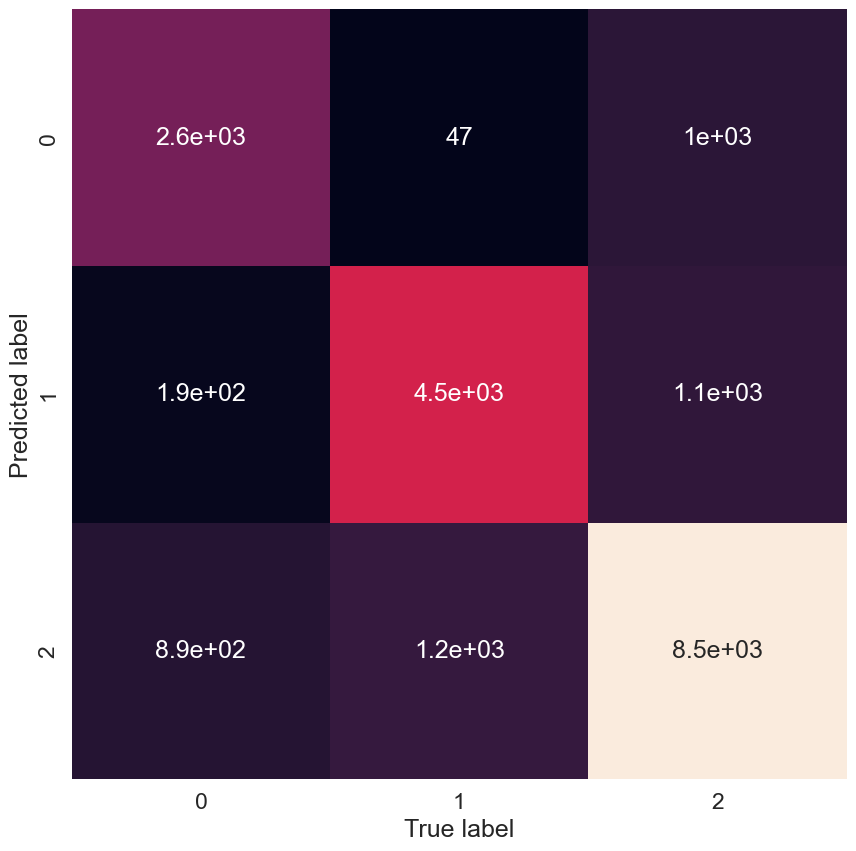

In [128]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test, Y_preds_rfc)

In [106]:
print(classification_report(Y_test,Y_preds_rfc))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71      3505
         1.0       0.78      0.78      0.78      5946
         2.0       0.80      0.80      0.80     10549

    accuracy                           0.78     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.78      0.78      0.78     20000



In [128]:
df_train.iloc[25]

Age                            54.000000
Occupation                      5.000000
Annual_Income               30689.890000
Monthly_Inhand_Salary        2612.490833
Num_Bank_Accounts               2.000000
Num_Credit_Card                 5.000000
Interest_Rate                   4.000000
Num_of_Loan                     1.000000
Delay_from_due_date             5.000000
Num_of_Delayed_Payment          3.000000
Changed_Credit_Limit            1.990000
Num_Credit_Inquiries            4.000000
Credit_Mix                      1.000000
Outstanding_Debt              632.460000
Credit_Utilization_Ratio       35.279982
Credit_History_Age            208.000000
Payment_of_Min_Amount           0.000000
Total_EMI_per_month            16.415452
Amount_invested_monthly       124.881820
Payment_Behaviour               5.000000
Monthly_Balance               409.951812
Credit_Score                    2.000000
Name: 25, dtype: float64

In [138]:
 scaler.transform(X.iloc[25].values.reshape(1, -1))

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.09145246, -0.54203288, -0.10160024, -0.49863857, -0.12933693,
        -0.13512029, -0.14623962, -0.10167707, -1.08183056, -0.12487992,
        -1.31890313, -0.12222647, -0.4804299 , -0.68588599,  0.58376261,
        -0.13489436, -1.34198521, -0.16710025, -0.25767259,  1.1101051 ,
         0.03353137]])

In [108]:
import pickle

In [110]:
pickle.dump(rs_rfc, open("Credit_score_classification.pkl","wb"))

In [116]:
pickeld_model = pickle.load(open("Credit_score_classification.pkl","rb"))

In [140]:
pickeld_model.predict(scaler.transform(X.iloc[25].values.reshape(1, -1)))

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2.])

In [142]:
Y.iloc[25]

2.0